In [1]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [2]:
import uuid   # Unique identifier
import os
import time

In [3]:
!pip install pyqt5 lxml --upgrade

Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the 'c:\program files\python39\python.exe -m pip install --upgrade pip' command.


In [4]:
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc


In [5]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 500 --data dataset.yml --weights yolov5s.pt --workers 2


Traceback (most recent call last):
  File "D:\Programming\Computer_Vision\Yolo\yolov5\train.py", line 23, in <module>
    import yaml
ModuleNotFoundError: No module named 'yaml'


In [2]:
!cd D:\Programming\Computer_Vision\Yolo\yolov5
# the key to detect objects
# !pip install -r requirements.txt

In [4]:
!pip install -r D:\Programming\Computer_Vision\Yolo\yolov5\requirements.txt

In [9]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\twisted_fate/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2021-11-2 torch 1.9.0+cu111 CUDA:0 (NVIDIA GeForce GTX 1650, 4096.0MB)

Fusing layers... 
Model Summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [10]:
model

AutoShape(
  (model): Model(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        (act): SiLU(inplace=True)
      )
      (2): C3(
        (cv1): Conv(
          (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
          (act): SiLU(inplace=True)
        )
        (cv3): Conv(
          (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
          (act): SiLU(inplace=True)
        )
        (m): Sequential(
          (0): Bottleneck(
            (cv1): Conv(
              (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
              (act): SiLU(inplace=True)
            )
            (cv2): Conv(
              (co

In [11]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [12]:
device

device(type='cuda')

# 2.Make Detections with Images

In [16]:
img = "D:\Programming\Computer_Vision\Yolo\images_and_videos\images\Dog_and_Me.jpg"

In [17]:
results = model(img)
results.print()

image 1/1: 1080x1080 (no detections)
Speed: 58.8ms pre-process, 53.9ms inference, 0.0ms NMS per image at shape (1, 3, 640, 640)


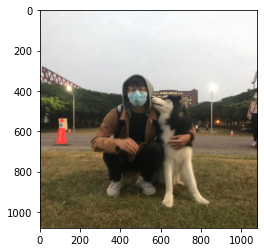

In [18]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render())) # for minuns 1 dimension (left one)
plt.show()

In [19]:
results.render()

[array([[[232, 232, 232],
         [232, 232, 232],
         [232, 232, 232],
         ...,
         [250, 250, 248],
         [250, 250, 248],
         [250, 250, 248]],
 
        [[232, 232, 232],
         [232, 232, 232],
         [232, 232, 232],
         ...,
         [250, 250, 248],
         [250, 250, 248],
         [250, 250, 248]],
 
        [[232, 232, 232],
         [232, 232, 232],
         [232, 232, 232],
         ...,
         [249, 249, 247],
         [250, 250, 248],
         [250, 250, 248]],
 
        ...,
 
        [[103,  87,  53],
         [104,  88,  54],
         [100,  84,  50],
         ...,
         [ 92,  75,  45],
         [ 91,  74,  44],
         [ 82,  65,  35]],
 
        [[109,  93,  59],
         [106,  90,  56],
         [ 99,  83,  49],
         ...,
         [ 90,  73,  43],
         [ 94,  77,  47],
         [ 90,  73,  43]],
 
        [[114,  98,  64],
         [109,  93,  59],
         [100,  84,  50],
         ...,
         [ 89,  72,  42],
  

# 3. Real Time Detections

In [20]:
cap = cv2.VideoCapture("D:\Programming\Computer_Vision\Yolo\images_and_videos\Videos\kaikai_kitan_piano.mp4") # or cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [7]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [8]:

import uuid   # Unique identifier
import os
import time

In [21]:
IMAGES_PATH = "D:\Programming\Computer_Vision\Yolo\yolov5\data\images" #/data/images
labels = ['awake', 'drowsy']
number_imgs = 20

In [17]:
!cd D:\Programming\Computer_Vision\Yolo\yolov5

In [22]:
cap = cv2.VideoCapture(0)
# Loop through labels
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5)
    
    # Loop through image range
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        
        # Webcam feed
        ret, frame = cap.read()
        
        # Naming out image path
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        
        # Writes out image to file 
        cv2.imwrite(imgname, frame)
        
        # Render to the screen
        cv2.imshow('Image Collection', frame)
        
        # 2 second delay between captures
        time.sleep(2)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

In [23]:
print(os.path.join(IMAGES_PATH, labels[0]+'.'+str(uuid.uuid1())+'.jpg'))

D:\Programming\Computer_Vision\Yolo\yolov5\data\images\awake.b4dc8226-3c34-11ec-9090-94e6f7a1c25e.jpg


In [24]:
for label in labels:
    print('Collecting images for {}'.format(label))
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        print(imgname)

D:\Programming\Computer_Vision\Yolo\yolov5\data\images\awake.b5b09dfc-3c34-11ec-89dc-94e6f7a1c25e.jpg
D:\Programming\Computer_Vision\Yolo\yolov5\data\images\awake.b5b09dfd-3c34-11ec-a8cd-94e6f7a1c25e.jpg
D:\Programming\Computer_Vision\Yolo\yolov5\data\images\awake.b5b09dfe-3c34-11ec-8fce-94e6f7a1c25e.jpg
D:\Programming\Computer_Vision\Yolo\yolov5\data\images\awake.b5b09dff-3c34-11ec-8b26-94e6f7a1c25e.jpg
D:\Programming\Computer_Vision\Yolo\yolov5\data\images\awake.b5b09e00-3c34-11ec-b18b-94e6f7a1c25e.jpg
D:\Programming\Computer_Vision\Yolo\yolov5\data\images\awake.b5b09e01-3c34-11ec-b097-94e6f7a1c25e.jpg
D:\Programming\Computer_Vision\Yolo\yolov5\data\images\awake.b5b09e02-3c34-11ec-9eab-94e6f7a1c25e.jpg
D:\Programming\Computer_Vision\Yolo\yolov5\data\images\awake.b5b09e03-3c34-11ec-bd74-94e6f7a1c25e.jpg
D:\Programming\Computer_Vision\Yolo\yolov5\data\images\awake.b5b0c4d9-3c34-11ec-93b0-94e6f7a1c25e.jpg
D:\Programming\Computer_Vision\Yolo\yolov5\data\images\awake.b5b112c5-3c34-11ec-9c

In [14]:
img = os.path.join('data', 'images', 'drowsy.11aa6510-3c33-11ec-84a3-94e6f7a1c25e.jpg')

In [15]:
results = model(img)
results.print()

NameError: name 'model' is not defined